Q2
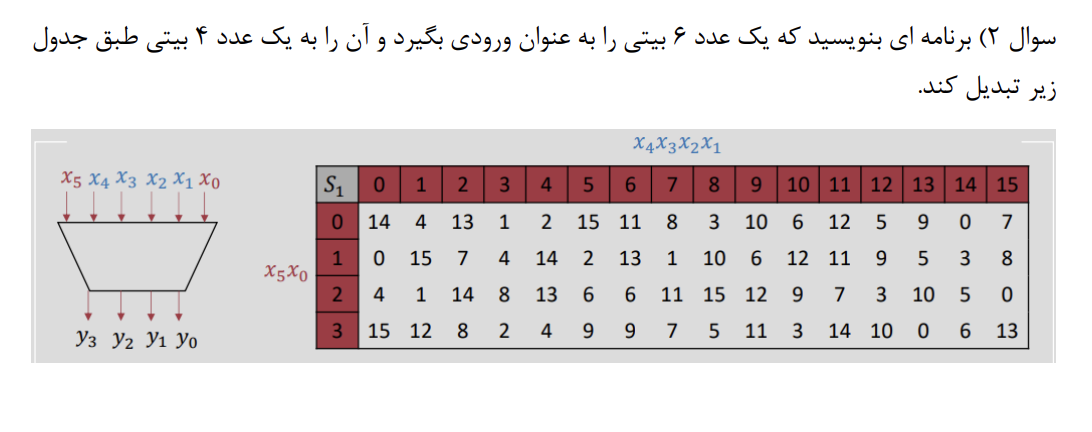

In [5]:
def validate_input(binary_input):
    if len(binary_input) != 6:
        return False
    return all(bit in '01' for bit in binary_input)

def convert_6bit_to_4bit(binary_input):
    if not validate_input(binary_input):
        return "Invalid input"
    
    x5 = int(binary_input[0])
    x4 = int(binary_input[1])
    x3 = int(binary_input[2])
    x2 = int(binary_input[3])
    x1 = int(binary_input[4])
    x0 = int(binary_input[5])
    
    S1_table = [
        [14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
        [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
        [4, 1, 14, 8, 13, 6, 6, 11, 15, 12, 9, 7, 3, 10, 5, 0],
        [15, 12, 8, 2, 4, 9, 9, 7, 5, 11, 3, 14, 10, 0, 6, 13]
    ]
    
    row = (x5 << 1) | x0
    col = (x4 << 3) | (x3 << 2) | (x2 << 1) | x1
    

    result = S1_table[row][col]
    binary_result = format(result, '04b')
    
    return binary_result


def main():
    binary_input = input("Enter a 6-bit binary number: ")
    result = convert_6bit_to_4bit(binary_input)
    print(f"4-bit output: {result}")

if __name__ == "__main__":
    main()

Enter a 6-bit binary number: 010010
4-bit output: 1010


Q3
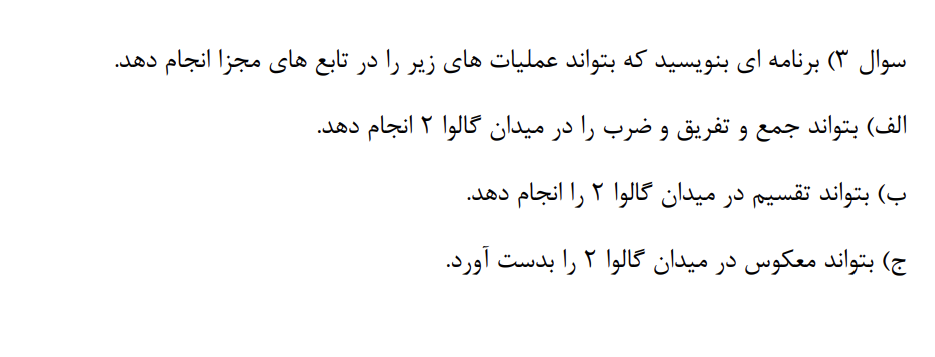

In [6]:
def add_gf2(a, b):
    return (a + b) % 2

def subtract_gf2(a, b):
    return (a - b) % 2

def multiply_gf2(a, b):
    return (a * b) % 2

def divide_gf2(a, b):
    if b == 0:
        raise ValueError("Division by zero is undefined")
    # In GF(2), division by 1 returns the same number
    return a if b == 1 else 0

def inverse_gf2(a):
    if a == 0:
        raise ValueError("Zero has no multiplicative inverse")
    # In GF(2), 1 is its own inverse
    return 1 if a == 1 else None

def test_gf2_operations():
    print("Testing GF(2) operations:")
    print(f"1 + 1 = {add_gf2(1, 1)}")
    print(f"1 - 1 = {subtract_gf2(1, 1)}")
    print(f"1 * 1 = {multiply_gf2(1, 1)}")
    print(f"1 ÷ 1 = {divide_gf2(1, 1)}")
    print(f"Inverse of 1 = {inverse_gf2(1)}")

if __name__ == "__main__":
    test_gf2_operations()

Testing GF(2) operations:
1 + 1 = 0
1 - 1 = 0
1 * 1 = 1
1 ÷ 1 = 1
Inverse of 1 = 1


Q4
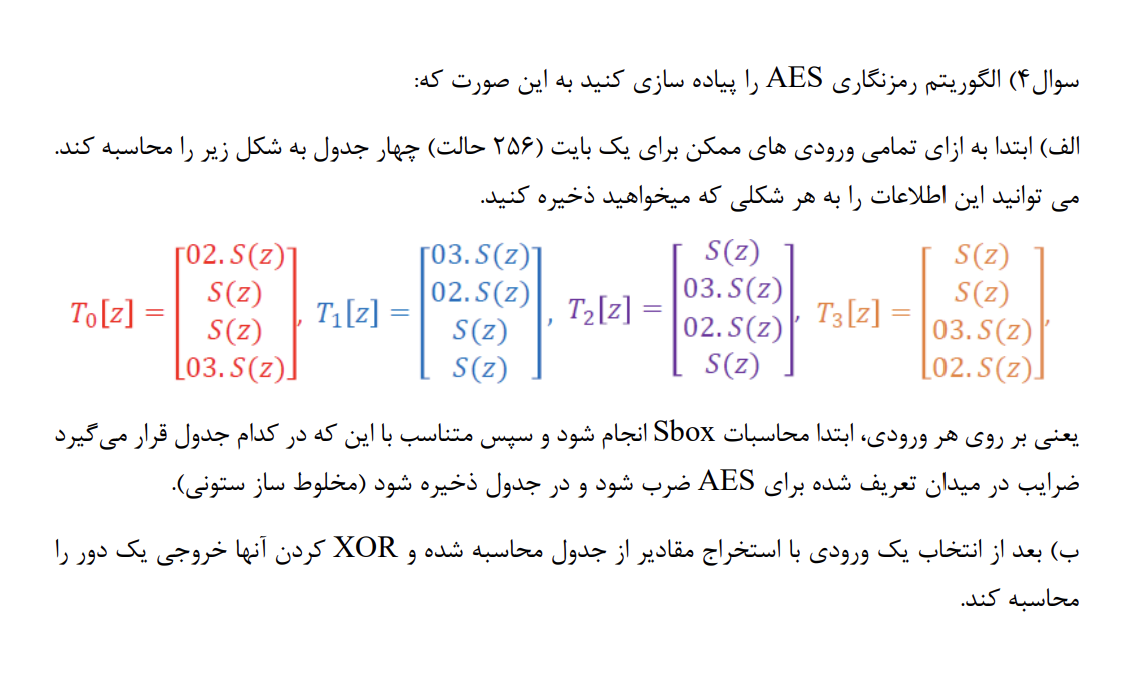

In [9]:
def aes_sbox_lookup(byte):
    # Implementation of the standard AES S-box table
    sbox = [
        [0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76],
        [0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0],
        [0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15],
        [0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75],
        [0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84],
        [0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf],
        [0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8],
        [0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2],
        [0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73],
        [0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb],
        [0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79],
        [0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08],
        [0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a],
        [0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e],
        [0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf],
        [0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]
    ]
    
    # Extract the row and column from the input byte
    row = byte >> 4 
    col = byte & 0x0F  
    
    return sbox[row][col]

def calculate_t_tables():
    t_tables = [[], [], [], []]
    
    for z in range(256):
        s_z = aes_sbox_lookup(z)
        
        multiply_2 = gmul(2, s_z)  # Multiply by 0x02
        multiply_3 = gmul(3, s_z)  # Multiply by 0x03
        

        t_tables[0].append([multiply_2, s_z, s_z, multiply_3])
        t_tables[1].append([multiply_3, multiply_2, s_z, s_z])
        t_tables[2].append([s_z, multiply_3, multiply_2, s_z])
        t_tables[3].append([s_z, s_z, multiply_3, multiply_2])
    
    return t_tables

def aes_round(state, t_tables):
    result = [0] * 16
    
    # Apply T-tables and XOR results
    for i in range(4):
        t0 = t_tables[0][state[4*i]]
        t1 = t_tables[1][state[4*i + 1]]
        t2 = t_tables[2][state[4*i + 2]]
        t3 = t_tables[3][state[4*i + 3]]
        
        for j in range(4):
            result[4*i + j] = t0[j] ^ t1[j] ^ t2[j] ^ t3[j]
    
    return result


# Implementation of multiplication in Galois Field
def gmul(a, b):
    p = 0
    for i in range(8):
        if b & 1:
            p ^= a
        hi_bit_set = a & 0x80
        a <<= 1
        if hi_bit_set:
            a ^= 0x1B  # AES irreducible polynomial
        b >>= 1
    return p & 0xFF
